In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
m = 2 # slope
c = 3 # intercept

In [3]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = x * m + c + noise

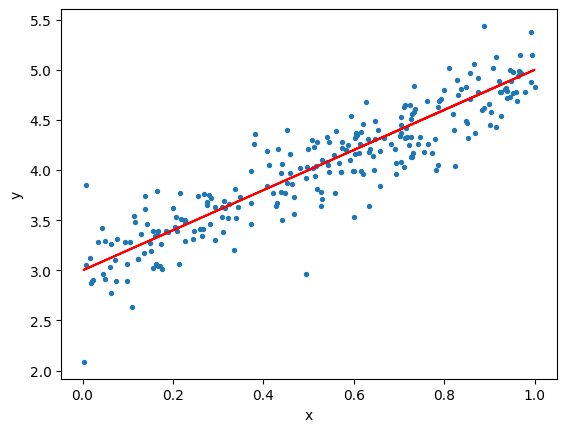

In [4]:
plt.scatter(x, y, s=8)
plt.plot(x, x * m + c, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim

(1, 1)

In [8]:
model = LinearRegressionModel(input_dim, output_dim)

In [9]:
loss_fn = nn.MSELoss()

In [10]:
[w, b] = model.parameters()

In [11]:
def get_param_values():
    return w.data[0][0].numpy(), b.data[0].numpy()

In [12]:
def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    w1 = w.data[0][0].numpy()
    b1 = b.data[0].numpy()
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label='Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()

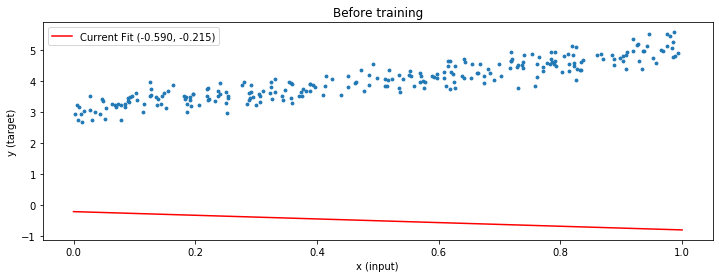

In [13]:
plot_current_fit('Before training')

In [14]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
def run_epoch(epoch):
    # Convert from numpy array to torch tensors
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear the gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get the outputs
    outputs = model(inputs)
    
    # Calcuate loss
    loss = loss_fn(outputs, labels)
    
    # Getting gradients from parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    return loss

<IPython.core.display.Javascript object>


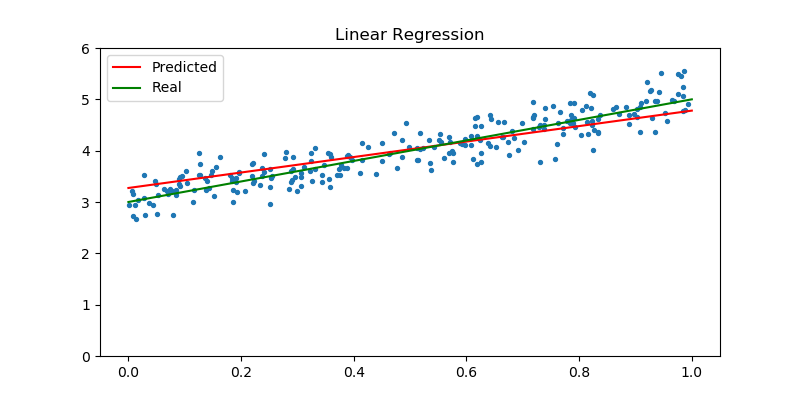

In [16]:
%matplotlib notebook

fig, (ax1) = plt.subplots(1, figsize=(8, 4))
ax1.scatter(x, y, s=8)

w1, b1 = get_param_values()
x1 = np.array([0., 1.])
y1 = x1 * w1 + b1
fit, = ax1.plot(x1, y1, 'r', label='Predicted'.format(w1, b1))
ax1.plot(x1, x1 * m + c, 'g', label='Real')
ax1.legend()
ax1.set_title('Linear Regression')

def init():
    ax1.set_ylim(0, 6)
    return fit,

def animate(i):
    loss = run_epoch(i)
    w1, b1 = get_param_values()
    y1 = x1 * w1 + b1
    fit.set_ydata(y1)

epochs = np.arange(1, 250)
ani = FuncAnimation(fig, animate, epochs, init_func=init, interval=100, blit=True, repeat=False)
plt.show()

In [17]:
get_param_values()

(array(1.5069984, dtype=float32), array(3.2730625, dtype=float32))